# 생선 길이로 무게 예측

- 회귀(Regression)
  - 임의의 어떤 숫자를 예측하는 문제
  - 변수들 사이의 상관관계를 분석하는 방법

- KNN 회귀
    1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
    
    2. k개의 샘플의 종속변수 값의 평균을 구함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터 준비

In [3]:
df = pd.read_csv("./data/Fish.csv")

In [4]:
# 농어 데이터만 사용
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [5]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [9]:
df.shape

(56, 3)

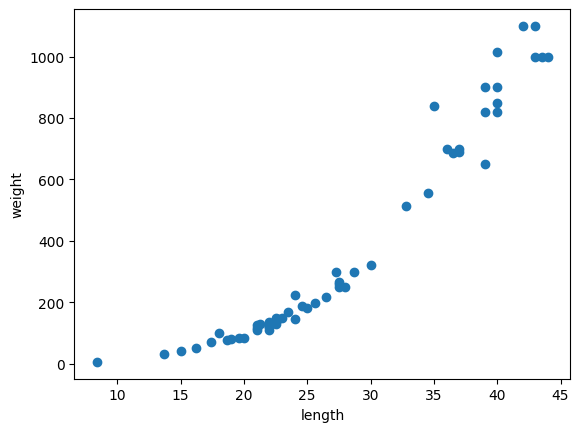

In [6]:
plt.Figure()

plt.scatter(df["Length2"], df["Weight"])
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

- 길이가 길어짐에 따라 무게가 증가하는 경향이 있음

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size=0.25, random_state=22)

In [11]:
print(len(x_train), len(x_test))

42 14


In [8]:
x_train.values

array([27.5, 22. , 36. , 28.7, 21.3, 21. , 20. , 21. , 37. , 23.5, 27.5,
       19. , 15. , 25.6, 22.5, 24. , 18.7, 22. , 40. , 36.5, 40. , 25. ,
       18. , 40. , 28. , 35. , 44. , 24. , 22. , 22. , 26.5, 42. , 27.5,
       19.6, 22.5, 37. , 34.5, 30. ,  8.4, 39. , 17.4, 43. ])

In [14]:
x_train.shape
# => 독립변수가 몇 개인지 빠짐
# [데이터 개수, 독립변수 수]의 모양으로 나와야함 (42, 1)

(42,)

In [15]:
# 독립변수는 2차원 배열이어야 함
x_train = np.reshape(x_train.values, (-1, 1))

In [16]:
x_train.shape

(42, 1)

In [17]:
x_train

array([[27.5],
       [22. ],
       [36. ],
       [28.7],
       [21.3],
       [21. ],
       [20. ],
       [21. ],
       [37. ],
       [23.5],
       [27.5],
       [19. ],
       [15. ],
       [25.6],
       [22.5],
       [24. ],
       [18.7],
       [22. ],
       [40. ],
       [36.5],
       [40. ],
       [25. ],
       [18. ],
       [40. ],
       [28. ],
       [35. ],
       [44. ],
       [24. ],
       [22. ],
       [22. ],
       [26.5],
       [42. ],
       [27.5],
       [19.6],
       [22.5],
       [37. ],
       [34.5],
       [30. ],
       [ 8.4],
       [39. ],
       [17.4],
       [43. ]])

In [18]:
x_test = np.reshape(x_test.values, (-1, 1))

# 모델 훈련

In [19]:
knr = KNeighborsRegressor(n_neighbors=5)

In [20]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

# 모델 평가

- 결정계수
  - 계산식
    - 1-((sum((타깃 - 예측)^2)) / (sum((타깃 - 타깃평균)^2)))
  
  - 모델의 설명력을 뜻함
  
  - 1에 가까울수록 모델 성능이 좋음

In [21]:
knr.score(x_test, y_test)

0.9501473912932493

- mean_absolute_error
  - 타깃과 예측의 절댓값 오차를 평균하여 반환

In [22]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [23]:
pred

array([ 183.4 ,  620.2 ,  248.6 , 1013.  ,  112.  ,  873.  ,  131.  ,
        873.  , 1013.  ,  953.  ,   73.6 ,  123.  ,  143.  ,   58.78])

In [24]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)

In [25]:
mae

49.07714285714286

In [26]:
pred_df = pd.DataFrame({"ans" : y_test, "pred" : pred})

In [27]:
pred_df

,ans,pred
98,188.0,183.40
109,514.0,620.20
102,300.0,248.60
126,1000.0,1013.00
84,125.0,112.00
118,820.0,873.00
93,145.0,131.00
117,650.0,873.00
124,1000.0,1013.00
122,820.0,953.00


<img src = "./image/KNN_VS_LINEAR.png">

In [28]:
max(x_train)

array([44.])

In [30]:
knr.predict([[50]])

array([1013.])

In [31]:
max(y_train)

1100.0

In [32]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

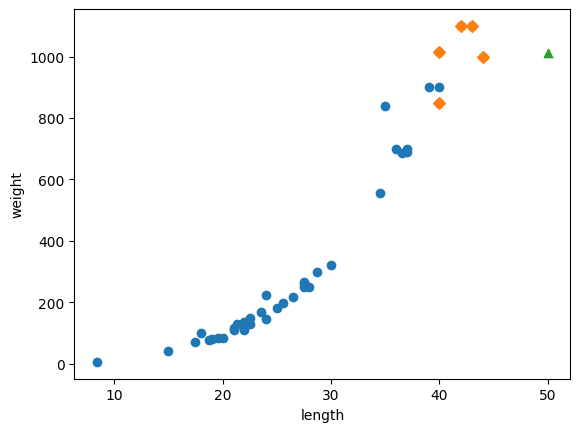

In [33]:
# 산점도 그리기
plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker="D")
plt.scatter(50, 1013, marker="^")

plt.xlabel("length")
plt.ylabel("weight")

plt.show()